In [1]:
# visualization packages
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# other packages
import numpy as np
import os
import pandas as pd
from scipy.stats import hypergeom

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# create a folder for figures
FIGURES_DIR = "figures"
if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)

In [3]:
# replace gene names with the most updated one
def update_genes(df, gene_col):
    
    new_df = pd.DataFrame()
    for i, row in df.iterrows():
    
        #not_in_string = ["SHANK3", "MARCA2", "DIPK2A", "SSPO", "RP11-1407O15.2", "PTCHD1-AS", "USP9Y", "MSNP1AS", "SHANK3", "MIR137", "NLGN4Y", "RPS10P2-AS1", "RP11-307N16.6", "RP11-1407O15.2"]
    
        replacements = {
            "ND1": "MT-ND1",
            "ND4": "MT-ND4",
            "TRNR1": "GFRA1",
            "CCM1": "KRIT1",
            "C19orf61": "SMG9",
            "EIF2C4": "AGO4",
            "HOXD": ["HOXD1", "HOXD3", "HOXD4", "HOXD8", "HOXD9", "HOXD10", "HOXD11", "HOXD12", "HOXD13"],
            "ATP6": "MT-ATP6",
            "APOE4": "APOE",
            "ENSG00000173575": "CHD2",
            "SCA2": "ATXN2",
            "B3GNT1": "B4GAT1",
            "COX3": "MT-CO3",
            "ENSG00000086848": "ALG9",
            "ATP8": "MT-ATP8",
            "ND5": "MT-ND5",
            "C2orf25": "MMADHC",
            "PIG6": "PRODH",
            "ENSG00000258947": "TUBB3",
            "ADCK3": "COQ8A", 
            "COX1": "MT-CO1",
            "DXS423E": "SMC1A",
            "PCDHG": ["PCDHGA1", "PCDHGA2", "PCDHGA3", "PCDHGA4", "PCDHGA5", "PCDHGA6", "PCDHGA7", "PCDHGA8", "PCDHGA9", "PCDHGA10", "PCDHGA11", "PCDHGA12", \
                      "PCDHGB1", "PCDHGB2", "PCDHGB3", "PCDHGB4", "PCDHGB5", "PCDHGB6", "PCDHGB7", "PCDHGC3", "PCDHGC4", "PCDHGC5"],
            "KIAA0226": "RUBCN",
            "CYTB": "MT-CYB",
            "KIAA0442": "AUTS2",
            "KAL1": "ANOS1",
            "BRP44L": "MPC1",
            "KIAA1715": "LNPK",
            "JMJD2C": "KDM4C",
            "CCDC64": "BICDL1" ,
            "KIAA2022": "NEXMIF",
            "INADL": "PATJ",
            "PIG6": "PRODH",
            "PARK2": "PRKN",
            "NDNL2": "NSMCE3",
            "BZRAP1": "TSPOAP1",
            "ERBB2IP": "ERBIN",
            "HIST1H2BJ": "H2BC11",
            "ADSS": "ADSS2",
            "C15orf43": "TERB2",
            "C16orf13": "METTL26",
            "C11orf30": "EMSY",
            "SUV420H1": "KMT5B",
            "MKL2": "MRTFB",
            "ENSG00000259159": "MFRP",
            "C11orf82": "DDIAS",
            "CSNK2B-LY6G5B-1181": "CSNK2B",
            "RP11-1055B8.7": "BAHCC1",
            "ENSG00000272414": "FAM47E-STBD1",
            "C5orf20": "DCANP1",
            "SOGA2": "MTCL1",
            "FAM194A": "ERICH6"
        }
        
        gene = row[gene_col]
        if gene in replacements:
            replacement = replacements[gene]
            if isinstance(replacement, str):
                print("Replaced", gene, "with", replacement)
                row[gene_col] = replacement
                new_df = new_df.append(row)
            else:
                for j in range(len(replacement)):
                    print("Replaced", gene, "with", replacement[j])
                    row[gene_col] = replacement[j]
                    new_df = new_df.append(row)
        else:
            new_df = new_df.append(row)
                    
    return new_df

### Get all genes from STRING PPI

In [4]:
info_df = pd.read_csv("9606.protein.info.v11.0.txt", sep='\t')
info_df = update_genes(info_df, "preferred_name")
PPI_all_genes = set(info_df['preferred_name'])
print("There are", str(len(PPI_all_genes)), "nodes in the PPI network")

Replaced KIAA2022 with NEXMIF
Replaced KAL1 with ANOS1
Replaced KIAA1715 with LNPK
Replaced KIAA0226 with RUBCN
Replaced SUV420H1 with KMT5B
Replaced B3GNT1 with B4GAT1
Replaced ENSG00000258947 with TUBB3
Replaced NDNL2 with NSMCE3
Replaced MKL2 with MRTFB
Replaced C15orf43 with TERB2
Replaced BZRAP1 with TSPOAP1
Replaced ADSS with ADSS2
Replaced ADCK3 with COQ8A
Replaced PARK2 with PRKN
Replaced INADL with PATJ
Replaced JMJD2C with KDM4C
Replaced ENSG00000173575 with CHD2
Replaced CCDC64 with BICDL1
Replaced ENSG00000272414 with FAM47E-STBD1
Replaced ERBB2IP with ERBIN
Replaced C11orf30 with EMSY
Replaced C16orf13 with METTL26
Replaced ENSG00000258947 with TUBB3
Replaced HIST1H2BJ with H2BC11
Replaced PIG6 with PRODH
Replaced ENSG00000259159 with MFRP
Replaced ENSG00000086848 with ALG9
There are 19556 nodes in the PPI network


# Get epilepsy WES genes
### Paper by Epi25 Collaborative
### https://www.cell.com/ajhg/fulltext/S0002-9297(19)30207-1

In [5]:
epilepsy_df = pd.read_csv("WES_EPI_gene_burden_AC_1_Epi25_Collaborative_2019.csv", skiprows=2, nrows=200)
epilepsy_df = update_genes(epilepsy_df, "Gene")
epilepsy_genes = set(epilepsy_df["Gene"])
print("There are a total of", str(len(epilepsy_genes)), "epilepsy WES genes.")

Replaced CSNK2B-LY6G5B-1181 with CSNK2B
Replaced C11orf82 with DDIAS
There are a total of 200 epilepsy WES genes.


### Remove epilepsy WES genes not found in STRING PPI network

In [6]:
epilepsy_genes_not_found = set()
for i in epilepsy_genes:
    if not i in PPI_all_genes:
        print(i)
        epilepsy_genes_not_found.add(i)

In [7]:
epilepsy_genes = epilepsy_genes.difference(epilepsy_genes_not_found)

print("After removing the genes not in the STRING PPI network:")
print("There are", len(epilepsy_genes), "epilepsy WES genes.")

After removing the genes not in the STRING PPI network:
There are 200 epilepsy WES genes.


# Get autism WES genes
### Paper by Satterstrom et al.
### https://www.cell.com/cell/pdf/S0092-8674(19)31398-4.pdf

In [8]:
autism_df = pd.read_csv("WES_autism_Satterstrom_2020.csv", nrows=102)
autism_df = update_genes(autism_df, "gene")
autism_genes = set(autism_df["gene"])
print("There are a total of", str(len(autism_genes)), "autism WES genes.")

Replaced SUV420H1 with KMT5B
There are a total of 102 autism WES genes.


### Remove autism WES genes not found in STRING PPI network

In [9]:
autism_genes_not_found = set()
for i in autism_genes:
    if not i in PPI_all_genes:
        print(i)
        autism_genes_not_found.add(i)

SHANK3


In [10]:
autism_genes = autism_genes.difference(autism_genes_not_found)

print("After removing the genes not in the STRING PPI network:")
print("There are", len(autism_genes), "autism WES genes.")

After removing the genes not in the STRING PPI network:
There are 101 autism WES genes.


# Setup

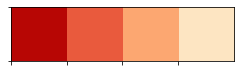

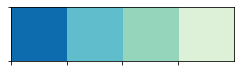

In [11]:
# color palettes for epilepsy and autism

col_pal_a = sns.color_palette("OrRd_r")
col_pal_a = [col_pal_a[0], [sum(x)/2 for x in zip(col_pal_a[1], col_pal_a[2])], col_pal_a[3], col_pal_a[5]]
sns.palplot(col_pal_a)

col_pal_e = sns.color_palette("GnBu_r")
col_pal_e = [col_pal_e[0], col_pal_e[2], col_pal_e[3], col_pal_e[5]]
sns.palplot(col_pal_e)

# Helper Functions

In [12]:
# test for enrichment in a gene group given a distribution of the genes among the modules
def test_enrichement(distribution, coms):
    
    p_vals = []
    enrichment = []
    
    M = sum([len(com) for com in coms.communities]) # population size
    n = sum(distribution) # number of successes in population

    for i, com in enumerate(coms.communities):
        x = distribution[i] # number of drawn successes
        N = len(com) # sample size

        mean = hypergeom.mean(M, n, N, loc=0)

        pval = -1
        if x < mean:
            pval = hypergeom.cdf(x, M, n, N)
            enrichment.append(-1) # less than expected
        else:
            pval = hypergeom.sf(x-1, M, n, N)
            enrichment.append(1) # more then expected
            
        p_vals.append(pval)
        
    return p_vals, enrichment

In [13]:
# get a non-normalized distribution of a gene group among the modules
def get_distribution_total(group, coms):
    distribution = [len(set(com).intersection(group)) for com in coms.communities]
    return distribution

In [14]:
# get which modules are enriched in a certain gene group
def get_enriched_modules(pvals, enrichment, alpha):
    enriched_modules = []
    for i in range(len(pvals)):
        if enrichment[i] == 1 and pvals[i] < alpha:
            enriched_modules.append(i+1)
        
    return enriched_modules

In [15]:
# plot the distribution of a gene group among the modules
def plot_distribution(distribution_list, distribution_labels, enriched_modules, pvals, module_cutoff, col_pal, y_axes_col, y_labels, y_lims=None, scatter_list=None, color_list=None, save_fig=False, fig_title=None):

    matplotlib.rcParams.update({'font.size': 20})
    fig, ax1 = plt.subplots(figsize=(14,8))
    index = np.arange(module_cutoff)
    
    if len(distribution_list) > 2:
        bar_width = 0.2
    else:
        bar_width = 0.3
    opacity = 0.8

    for i, distribution in enumerate(distribution_list):
        rects = ax1.bar(index + i*bar_width, distribution[:module_cutoff], bar_width, alpha=opacity, color=col_pal[i], label=distribution_labels[i])
        
        if len(distribution_list) == len(pvals):
            for j, rect in enumerate(rects, 1):
                if j in enriched_modules[i]:
                    height = rect.get_height()
                    if pvals[i][j-1] < 0.01:
                        plt.text(rect.get_x() + rect.get_width()/2.0, height, '**', ha='center', va='bottom')
                    else:
                        plt.text(rect.get_x() + rect.get_width()/2.0, height, '*', ha='center', va='bottom')
    
    # one p-value for all bars
    if len(distribution_list) != len(pvals):
        for j, rect in enumerate(rects, 1):
            if j in enriched_modules[0]:
                height = rect.get_height()
                if pvals[0][j-1] < 0.01:
                    plt.text(index[j-1], height, '**', ha='center', va='bottom')
                else:
                    plt.text(index[j-1], height, '*', ha='center', va='bottom')

    ax1.set_xlabel('Module')
    x_tick_labels = [str(i) for i in range(1, module_cutoff + 1)]
    x_ticks = index + (bar_width*(len(distribution_list)-1))/2
    
    color = "black"
    ax1.set_ylabel(y_labels[0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend(loc="upper center")
    
    if y_lims:
        ax1.set_ylim(y_lims[0])

    if scatter_list:
        ax2 = ax1.twinx()
        color = y_axes_col[1]
        for i, scatter in enumerate(scatter_list):
            ax2.scatter(x_ticks, scatter[:module_cutoff], color=color_list[i])
        ax2.set_ylabel(y_labels[1], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylim(y_lims[1])
    
    plt.xticks(x_ticks, x_tick_labels)    
    fig.tight_layout()
    
    if save_fig:
        plt.savefig(FIGURES_DIR + "/" + fig_title + ".png", dpi=300)
    plt.show()

# Generate modules in the epilepsy-autism PPI network

In [16]:
modules_df = pd.read_csv("gene_info_all_genes.tsv", sep="\t")

In [17]:
PPI_genes = set(modules_df["node"])
print("Number of genes in the epilepsy-autism PPI network:", len(PPI_genes))

num_modules = max(modules_df["module"])
print("Number of modules in the epilepsy-autism PPI network:", num_modules)

Number of genes in the epilepsy-autism PPI network: 1697
Number of modules in the epilepsy-autism PPI network: 326


In [18]:
# define the communities
communities = []
for i in range(num_modules):
    communities.append([])

for i, row in modules_df.iterrows():
    module = row["module"]
    gene = row["node"]
    communities[module - 1].append(gene)
    
class leiden_coms:
    communities = []
    
leiden_coms.communities = communities

# Enrichment analysis of epilepsy and autism WES genes

In [19]:
common_genes = epilepsy_genes.intersection(autism_genes)

In [20]:
# only look into largest 17 modules
MODULE_CUTOFF = 17

In [21]:
# size of each community
coms_size = [len(com) for com in leiden_coms.communities]

In [22]:
pvals_e, enrichment_e = test_enrichement(get_distribution_total(epilepsy_genes, leiden_coms), leiden_coms)
enriched_modules_e = get_enriched_modules(pvals_e, enrichment_e, alpha=0.05)

pvals_a, enrichment_a = test_enrichement(get_distribution_total(autism_genes, leiden_coms), leiden_coms)
enriched_modules_a = get_enriched_modules(pvals_a, enrichment_a, alpha=0.05)

pvals_c, enrichment_c = test_enrichement(get_distribution_total(common_genes, leiden_coms), leiden_coms)
enriched_modules_c = get_enriched_modules(pvals_c, enrichment_c, alpha=0.05)

In [23]:
distribution_e = get_distribution_total(epilepsy_genes, leiden_coms)
distribution_a = get_distribution_total(autism_genes, leiden_coms)
distribution_c = get_distribution_total(common_genes, leiden_coms)

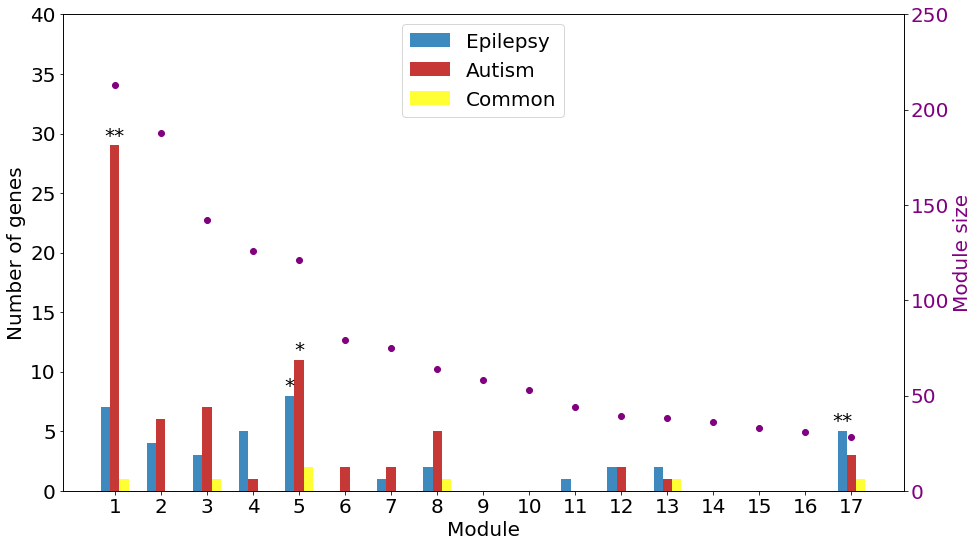

In [24]:
distribution_list = [distribution_e, distribution_a, distribution_c]
distribution_labels = ["Epilepsy", "Autism", "Common"]
enriched_modules = [enriched_modules_e, enriched_modules_a, enriched_modules_c]
pvals = [pvals_e, pvals_a, pvals_c]
y_labels = ["Number of genes", "Module size"]
y_lims = [(0, 40), (0, 250)]
y_axes_col = [col_pal_e[0], "purple"]
plot_distribution(distribution_list, distribution_labels, enriched_modules, pvals, MODULE_CUTOFF, [col_pal_e[0], col_pal_a[0], "yellow"], y_axes_col, y_labels, y_lims, scatter_list=[coms_size], color_list=['purple'], save_fig=True, fig_title="WES_distribution")
